In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
with open("moreno-4th-simple.dat", "r") as moreno: #Read the file into a variable
    moreno_data = [] # create a list
    for line in moreno:
        moreno_data.append(line) #read the file into a list line by line, each one representing an edge
moreno_data = [x.strip() for x in moreno_data] #strip the eol character

In [6]:
moreno_data

['BA AB',
 'BA BR1',
 'DE EP',
 'DE RY',
 'DE YL',
 'DE KN',
 'BR2 FA',
 'BR2 CH',
 'BR2 MC',
 'BR2 RS',
 'BR1 AB',
 'BR1 PN',
 'RY MR1',
 'FA VN',
 'AB SI1',
 'AB PN',
 'CV BU',
 'CV VN',
 'YL KI',
 'YL GR',
 'YL KN',
 'RS MC',
 'MR1 EP',
 'MR1 LN1',
 'MR1 SM',
 'MR1 LN2',
 'MR2 SI2',
 'MR2 CF',
 'MR2 WI',
 'MR2 LN2',
 'LI GR',
 'LI SN',
 'CH SI2',
 'CH FC',
 'GR SI1',
 'GR SN',
 'LN1 SM',
 'LN1 SN',
 'CF VN',
 'VN LN2',
 'VN BU',
 'VN FC',
 'LN2 FC',
 'LN2 WI',
 'KI KN']

In [10]:
#In the notes, we are asked to run a number of tests to verify the integrity of the data file. We will skip those tests
# and your assignment is to test the integrity of the data on your own.

G = nx.Graph()
for links in moreno_data:
    LS = links.split()
    G.add_edge(LS[0], LS[1])
print("This is the number of nodes ", len(G.nodes()))
print("This is the number of edges ", len(G.edges()))
    

This is the number of nodes  31
This is the number of edges  45


In [11]:
#Let's check the density of the network:

nx.density(G)

0.0967741935483871

In [12]:
# We would consider this network to be sparse. Remember what we say last week about what we can interpet density as?

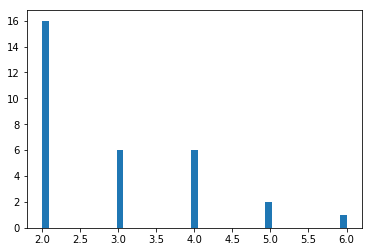

In [19]:
#Now let's look at the degree distribution of our network
plt.hist(sorted(nx.degree(G).values()), bins=45) #you can also do bins='auto'
plt.show()

In [25]:
#Now let's talk about paths

# A path is an ordered sequence of links such that consecutive links each have one link in common.

# A - B - C - D is a path of length 4

# Every path has source and destination. For undirected graphs we will use the first mentioned 
# node as source and the last as destination. In our path above, the source would be A and the destination would be D


In [ ]:
#Our focus will be on non-overlapping paths -- that is -- paths that do not visit the same node or link twice. Specifically,
# we will focus on the **shortest paths** of a network since they have some powerful implications.

In [ ]:
#Basically a shortest path is the path between node i and node j that requires the least number of hops.
# Yes, there may be more than one shortest path between 2 nodes.

In [ ]:
#No let's talk about how can calculate path length using the Breadth-first search algorithm, also known as the
# burning algorithm in Physics

#BFS works by identifying all immediately connected nodes to some given node i, then move one more length away and identifying
#all nodes connected to those nodes. Imagine a pebble dropping in some water, think of BFS as the waves that occur in the water
# from the impact of the pebble.

# The identified nodes are called the front.

In [26]:
def BFS(G,s):
    front=[s]
    d=0
    visited=[s]
    distance = {}
    distance[s]=d
    while len(front)>0:
        d+=1
        new_front=[]
        for i in front:
            for j in G.neighbors(i):
                if j in visited:
                    continue
                else:
                    new_front.append(j)
                    distance[j]=d
                    visited.append(j)
        front=new_front
    return(distance)


In [32]:
distance_dist = BFS(G, 'VN')
distance_dist

{'AB': 7,
 'BA': 8,
 'BR1': 8,
 'BR2': 2,
 'BU': 1,
 'CF': 1,
 'CH': 2,
 'CV': 1,
 'DE': 4,
 'EP': 3,
 'FA': 1,
 'FC': 1,
 'GR': 5,
 'KI': 6,
 'KN': 5,
 'LI': 5,
 'LN1': 3,
 'LN2': 1,
 'MC': 3,
 'MR1': 2,
 'MR2': 2,
 'PN': 8,
 'RS': 3,
 'RY': 3,
 'SI1': 6,
 'SI2': 3,
 'SM': 3,
 'SN': 4,
 'VN': 0,
 'WI': 2,
 'YL': 5}

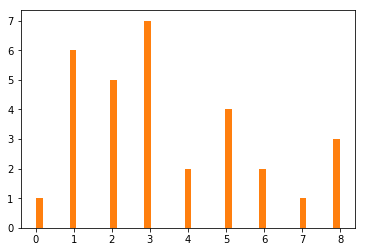

In [34]:
plt.hist(sorted(distance_dist.values()), bins=45) #you can also do bins='auto'
plt.show()